# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error

from tqdm import tqdm



In [2]:
try:
    data = pd.read_csv('m1_s7_MLntro.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net//datasets/users_behavior.csv')

data.head(20)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
data.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


## Разбейте данные на выборки

In [6]:
features = data.drop('is_ultra', axis=1)
target = data['is_ultra']

features_train, featrues_test_and_valid, target_train, target_test_and_valid = train_test_split(
    features, 
    target, 
    test_size=.4, 
    random_state=11223344,
    stratify=target
    )

features_test, features_valid, target_test, target_valid = train_test_split(
    featrues_test_and_valid, 
    target_test_and_valid, 
    test_size=.5, 
    random_state=11223344,
    stratify=target_test_and_valid
    )

print(f'features_train: {features_train.shape}')

print(f'features_test: {features_test.shape}')

print(f'features_valid: {features_valid.shape}')


features_train: (1928, 4)
features_test: (643, 4)
features_valid: (643, 4)


## Исследуйте модели

Лучшее значение глубины равно 5, точность равна 0.7947122861586314


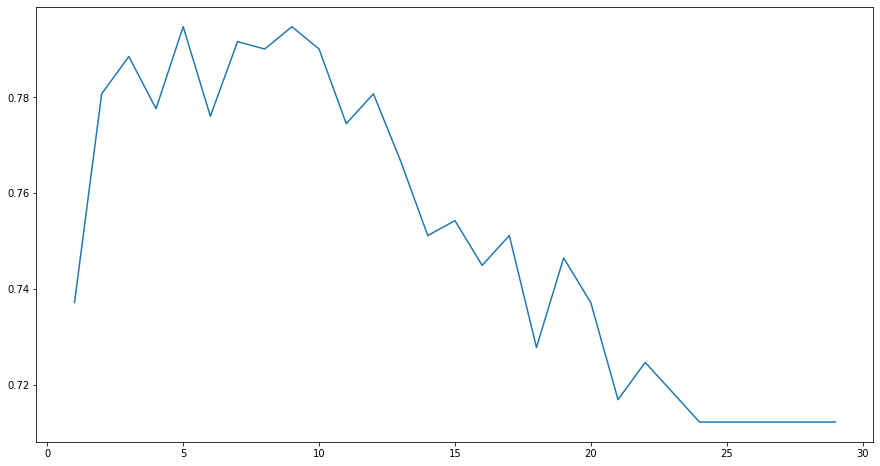

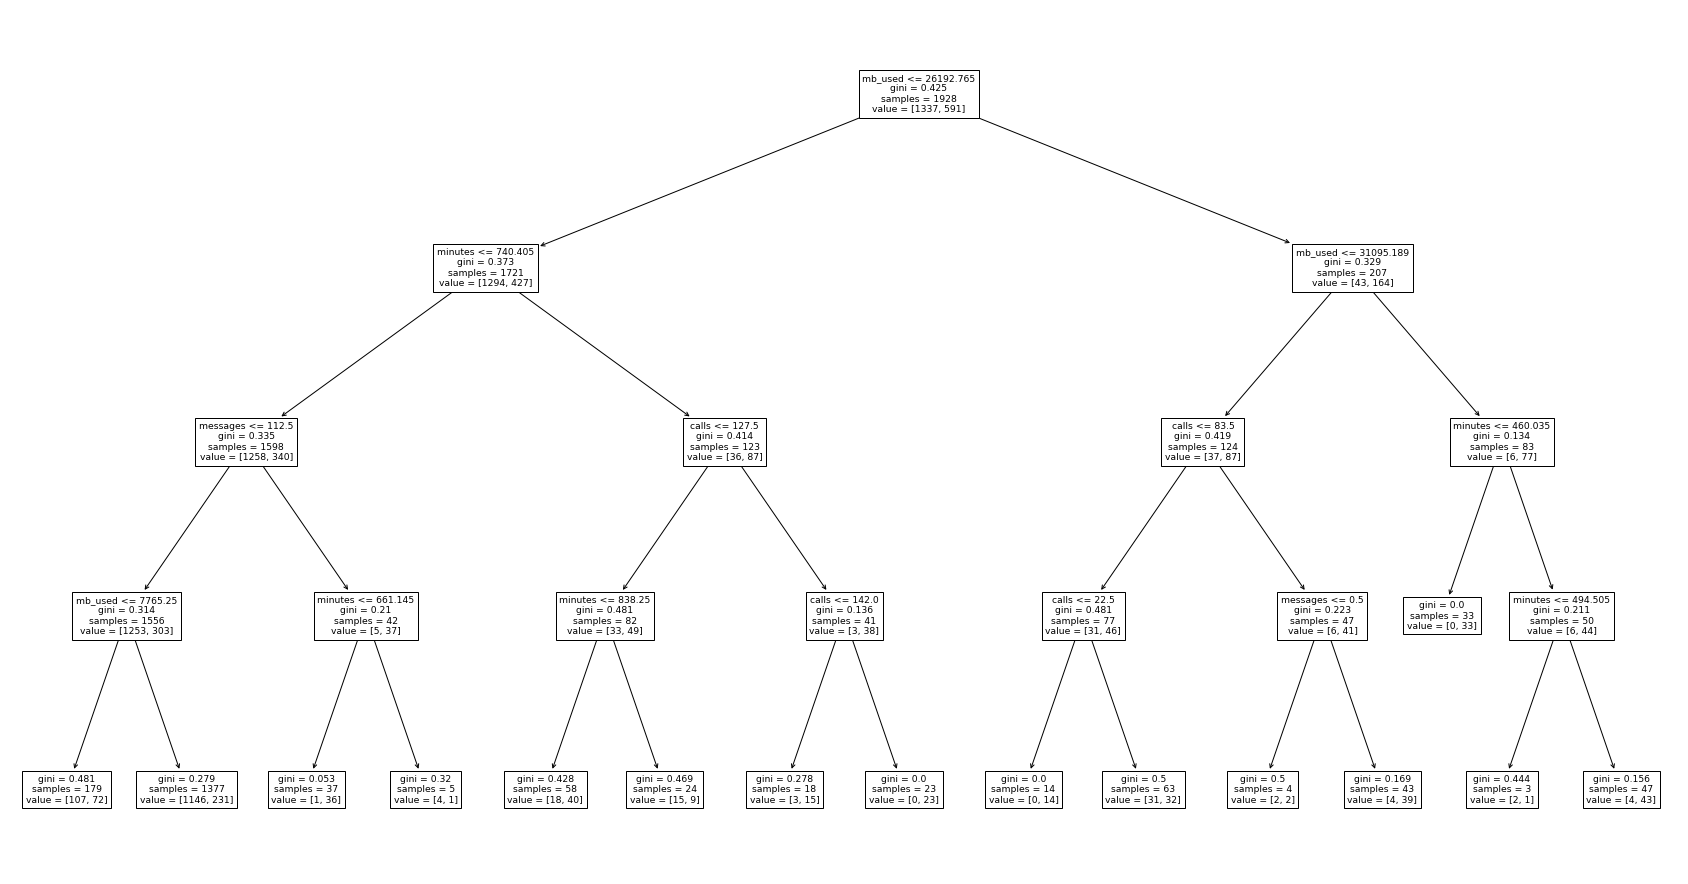

In [8]:
# проверим решающее дерево

scores = []
depths = []

for depth in range(1,30):
    model = DecisionTreeClassifier(random_state=11223344, max_depth=depth)

    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions_valid)
    scores.append(score)
    depths.append(depth)

best_score = max(scores)
best_depth = depths[scores.index(best_score)]


print(f'Лучшее значение глубины равно {best_depth}, точность равна {best_score}')

plt.subplots(figsize=(15, 8))
plt.plot(depths, scores)
plt.show()

plt.subplots(figsize=(30, 16))
sklearn.tree.plot_tree(DecisionTreeClassifier(random_state=11223344, max_depth=4).fit(features_train, target_train), feature_names=features_train.columns)

plt.show()

In [10]:
# проверим лес деревьев 
# выполняется ~10 мин (((

best_score = 0
best_est = 0
best_depth = 0
best_crit = ''

for est in tqdm(range(1,100)):
    for depth in range(1, 20):
        for crit in ['entropy', 'gini']:
            model = RandomForestClassifier(random_state=11223344, n_estimators=est, max_depth=depth, criterion=crit)

            model.fit(features_train, target_train)
            predictions_valid = model.predict(features_valid)
            score = accuracy_score(target_valid, predictions_valid)

        if score > best_score:
            best_est = est
            best_score = score
            best_depth = depth
            best_crit = crit

print(f'Максимальная точность равна точность равна {best_score} при количестве деревьев {best_est}, критерии {best_crit} и глубине {best_depth}')

100%|██████████| 99/99 [08:24<00:00,  5.09s/it]

Максимальная точность равна точность равна 0.8102643856920684 при количестве деревьев 32, критерии gini и глубине 10


In [11]:
# проверим логистическую регрессию

best_score = 0
best_iter = 0
for iter in range(100,500):
    model = LogisticRegression(random_state=11223344, solver='lbfgs', max_iter=iter)

    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions_valid)

    if score > best_score:
        best_iter = iter
        best_score = score

print(f'Лучшее количество итераций равно {best_iter}, точность равна {best_score}')

Лучшее количество итераций равно 100, точность равна 0.7465007776049767


Были проверены на точность три варианта моделей - дерево решений, логистическая регрессия и лес деревьев.

Лучше других себя показала модель Лес деревьев (accuracy = 0.81) - будем использовать ее

## Проверьте модель на тестовой выборке

In [14]:
model = RandomForestClassifier(random_state=11223344, n_estimators=32, criterion='gini', max_depth=10)

model.fit(features_train, target_train)

#prediction_test = model.predict(features_test)
print(features_train.shape)

print(model.score(features_test, target_test))

(1928, 4)
0.8242612752721618


In [15]:
features_big_train = pd.concat([features_train, features_valid])
target_big_train = pd.concat([target_train, target_valid])

model = RandomForestClassifier(random_state=11223344, n_estimators=32, criterion='gini', max_depth=10)

model.fit(features_big_train, target_big_train)

prediction_test = model.predict(features_test)

print(features_big_train.shape)
print('Score', model.score(features_test, target_test))

print('Accuracy', accuracy_score(target_test, prediction_test))

(2571, 4)
Score 0.8242612752721618
Accuracy 0.8242612752721618


## (бонус) Проверьте модели на адекватность

Для проверки адекватности модели сравним ее со случайной.

Вероятность случайного исхода равна 1/2 (так как вариантов всего два - 0 и 1), следовательно, доля правильных ответов случайной модели будет равна также 1/2.

In [16]:
(data.is_ultra.value_counts() / data.shape[0])[0] * .5 + (data.is_ultra.value_counts() / data.shape[0])[1] * .5

0.5

Точность модели выше полученного значения, следовательно, построенная модель вполне адекватна.

# Вывод

Исходные данные по использованию тарифов проверены, дубоикаты и пропущенные значения не обнаружены.

По ним были обучены и исследованы на точность три варианта модели классификации: Дерево Решений, Случайный Лес, Логистическая Регрессия.

Определена оптимальная модель - Лес деревьев при использовании энтропийного критерия, количестве деревьев 96 и глубиной 8.

Доля правильных ответов на тестовой выборке составляет 0.824.

Таким образом, обученная модель подходит для выбора тарифа.